In [1]:
from pathlib import Path
import decoupler as dc
import numpy as np
import plotnine as pn
import scanpy as sc
import pandas as pd
import partipy as pt
from partipy.datasets import load_ncM_lupus_data

data_dir = Path("..") / "data"
adata = load_ncM_lupus_data(data_dir=data_dir)
adata

AnnData object with n_obs × n_vars = 47819 × 30867
    obs: 'library_uuid', 'author_cell_type', 'sample_uuid', 'disease_state', 'donor_id', 'Processing_Cohort', 'ct_cov', 'ind_cov', 'cell_type', 'assay', 'disease', 'sex', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'Status'
    var: 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'

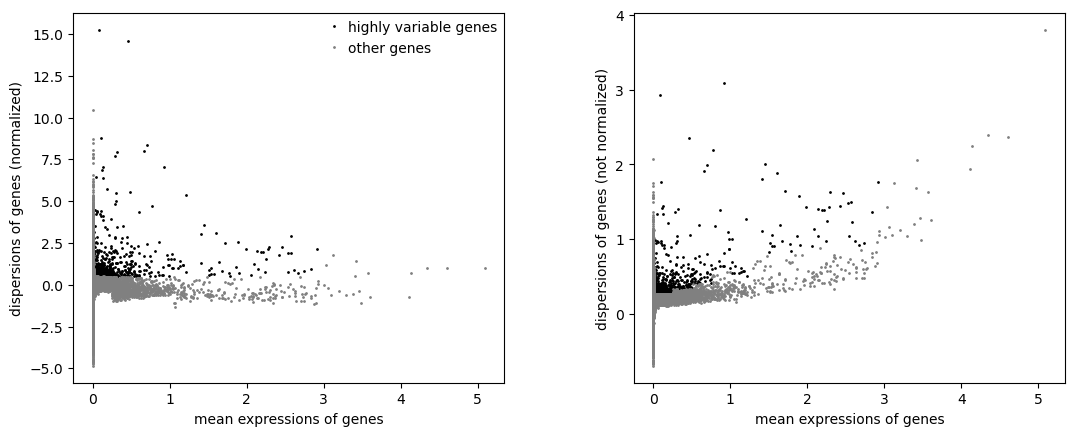

In [2]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
adata.layers["z_scaled"]= sc.pp.scale(adata.X, max_value=10)
sc.pp.highly_variable_genes(adata)
sc.pp.pca(adata, mask_var="highly_variable")
sc.pl.highly_variable_genes(adata)

100%|██████████| 50/50 [09:12<00:00, 11.05s/it]


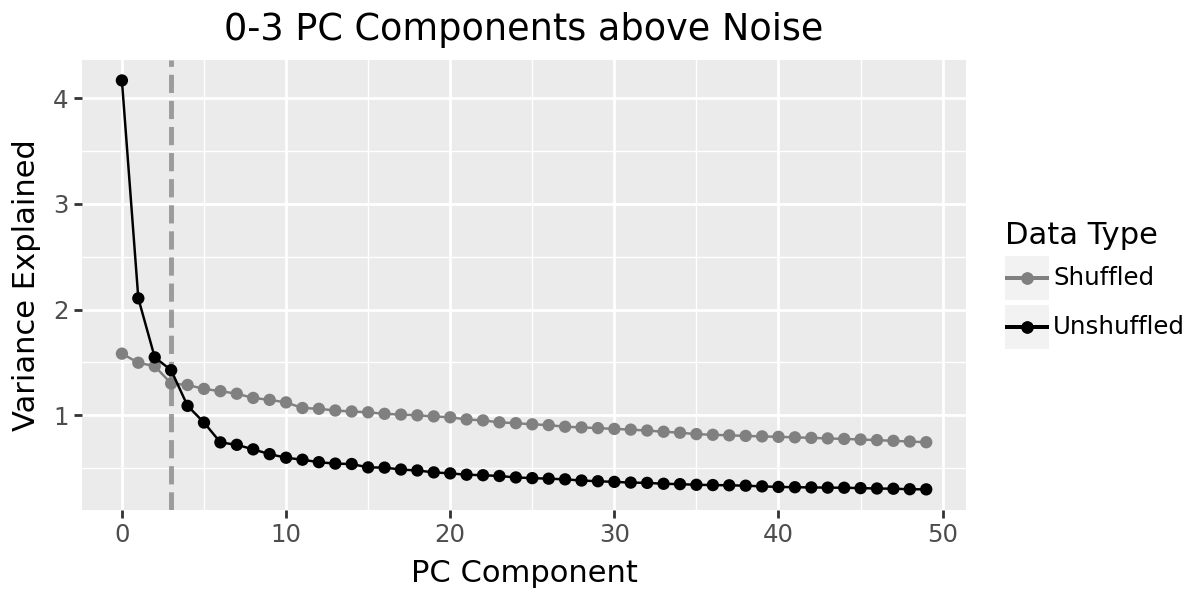

In [3]:
pt.compute_shuffled_pca(adata, mask_var="highly_variable")
pt.plot_shuffled_pca(adata)

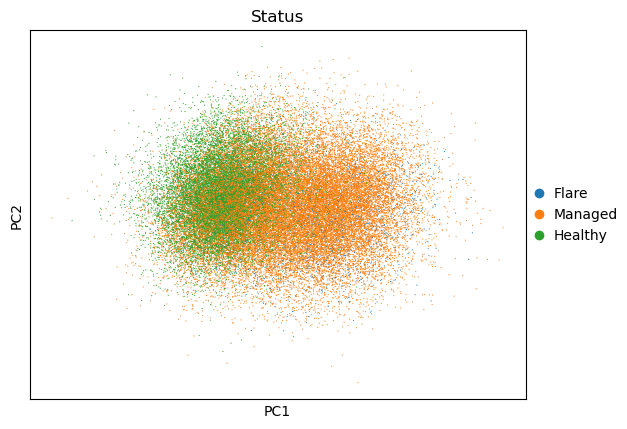

In [4]:
sc.pl.pca_scatter(adata, color="Status")

In [5]:
pt.set_obsm(adata, obsm_key="X_pca", n_dimensions=3)

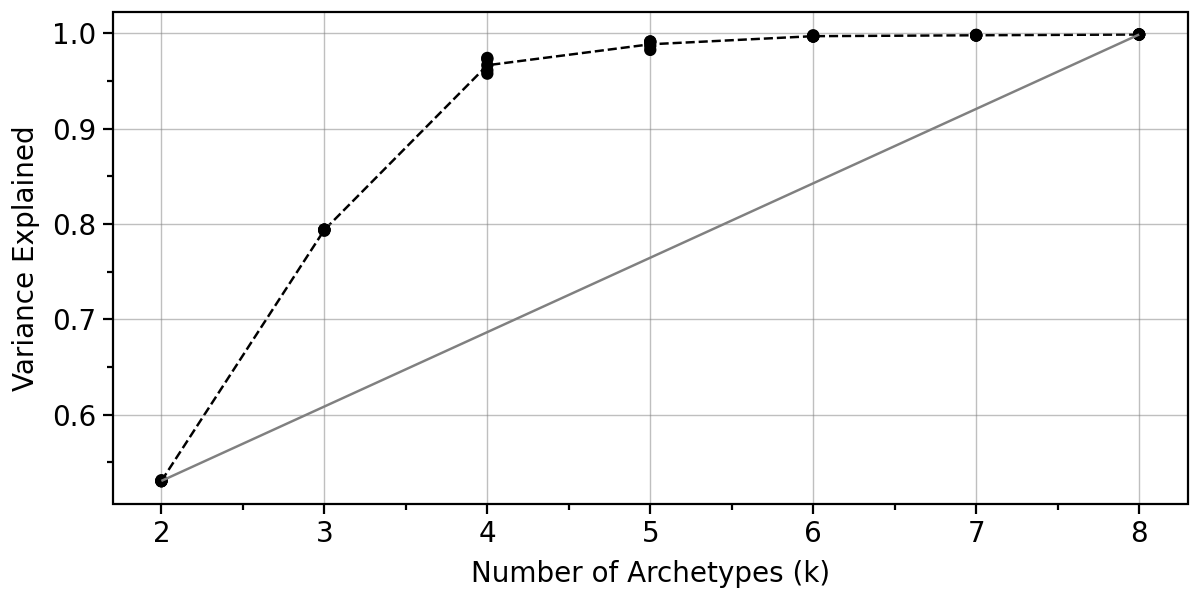

In [6]:
pt.compute_selection_metrics(adata=adata, min_k=2, max_k=8)
pt.plot_var_explained(adata)

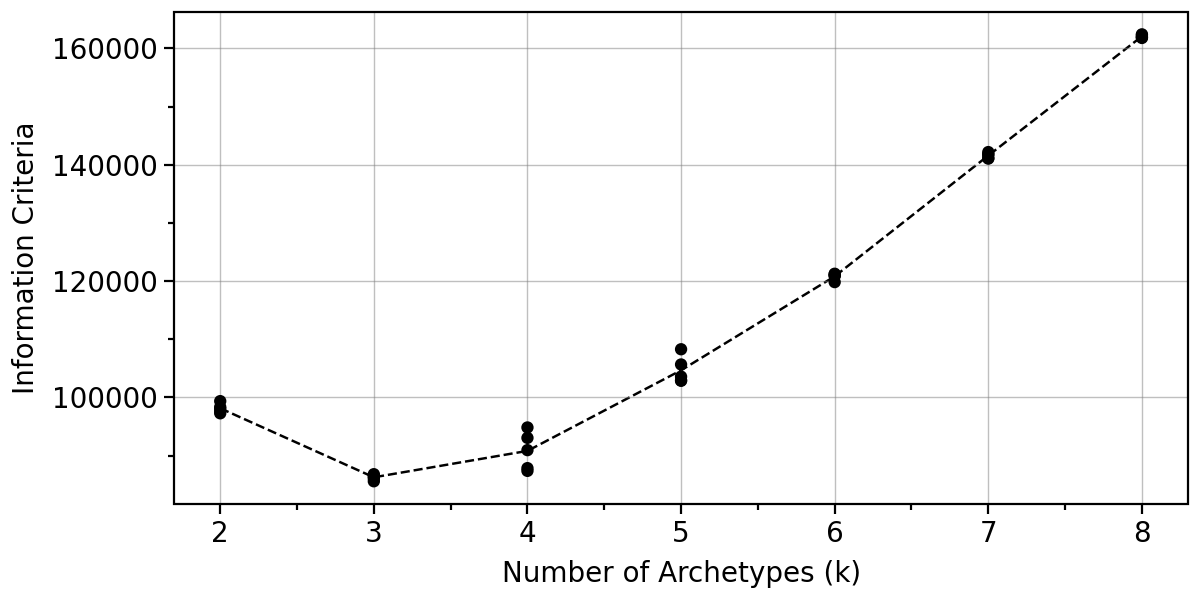

In [7]:
pt.plot_IC(adata)

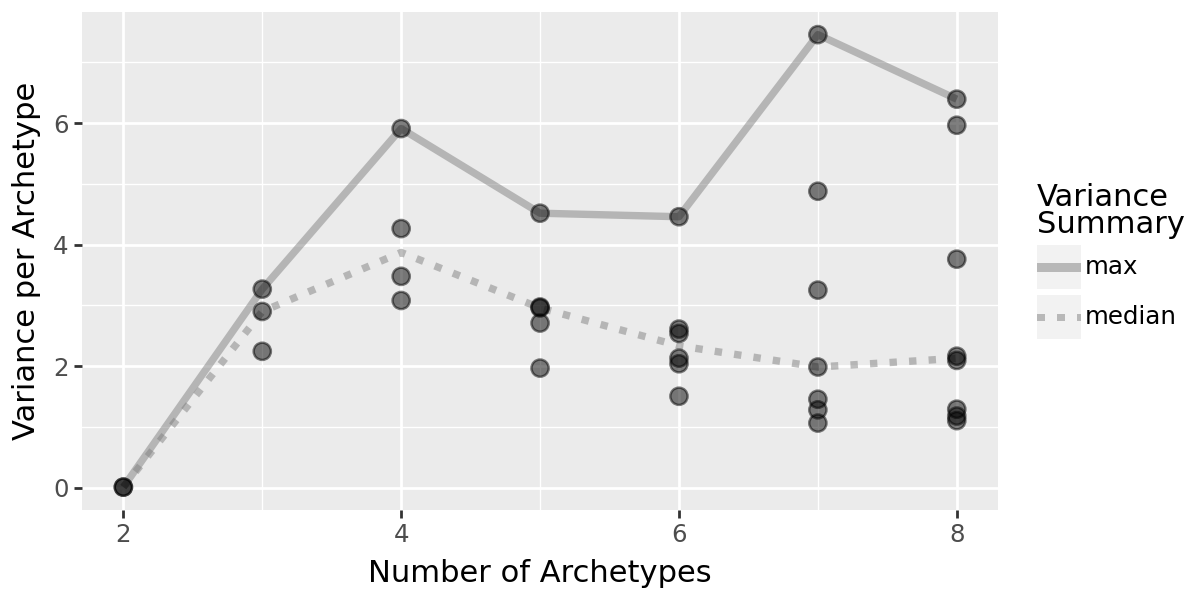

In [8]:
pt.compute_bootstrap_variance(adata=adata, n_bootstrap=20, n_archetypes_list=range(2, 9))
pt.plot_bootstrap_variance(adata)

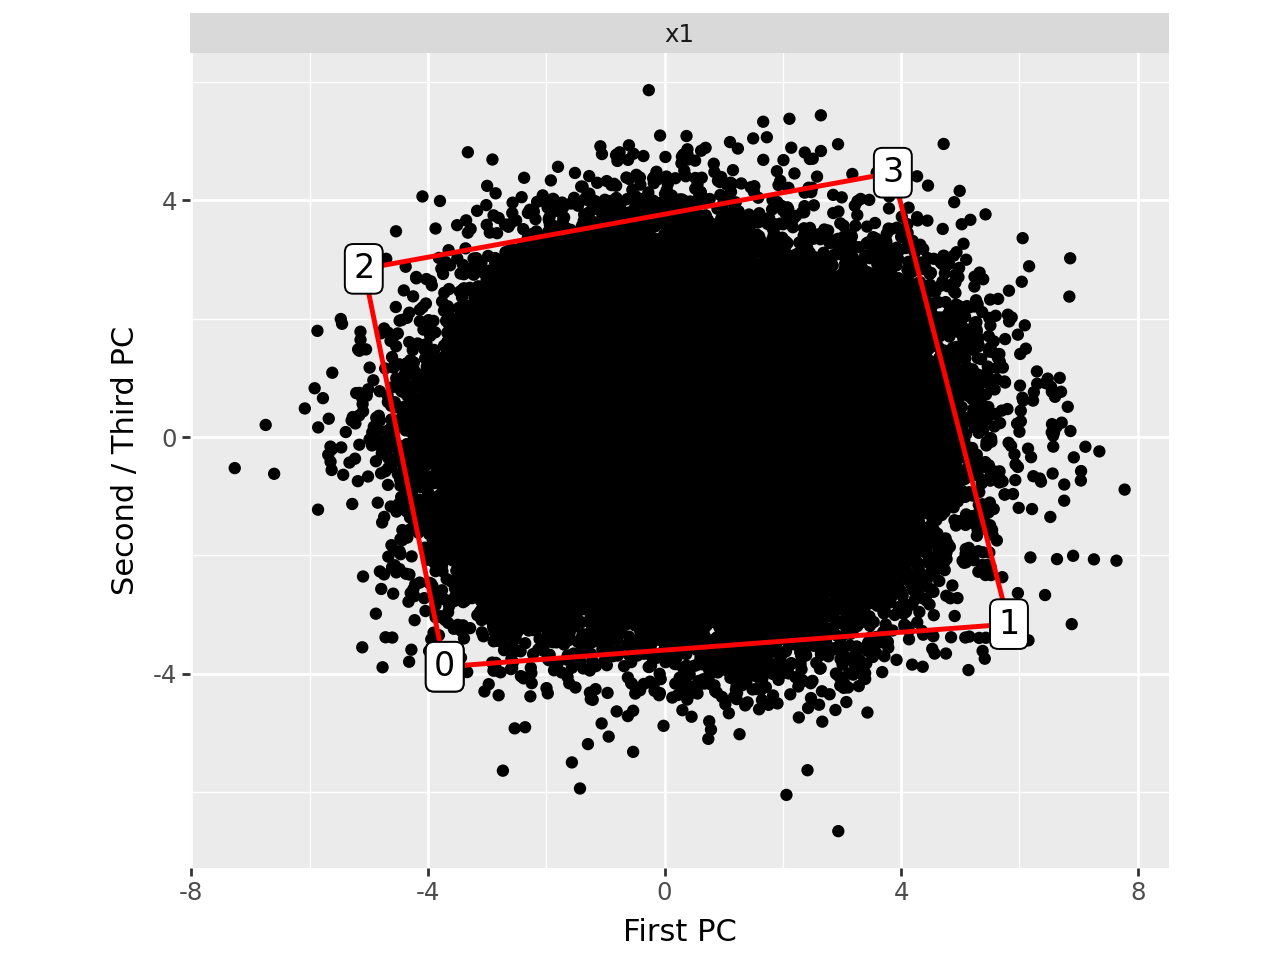

In [9]:
pt.compute_archetypes(adata, n_archetypes=4, archetypes_only=False)
    
pt.plot_archetypes_2D(adata=adata)

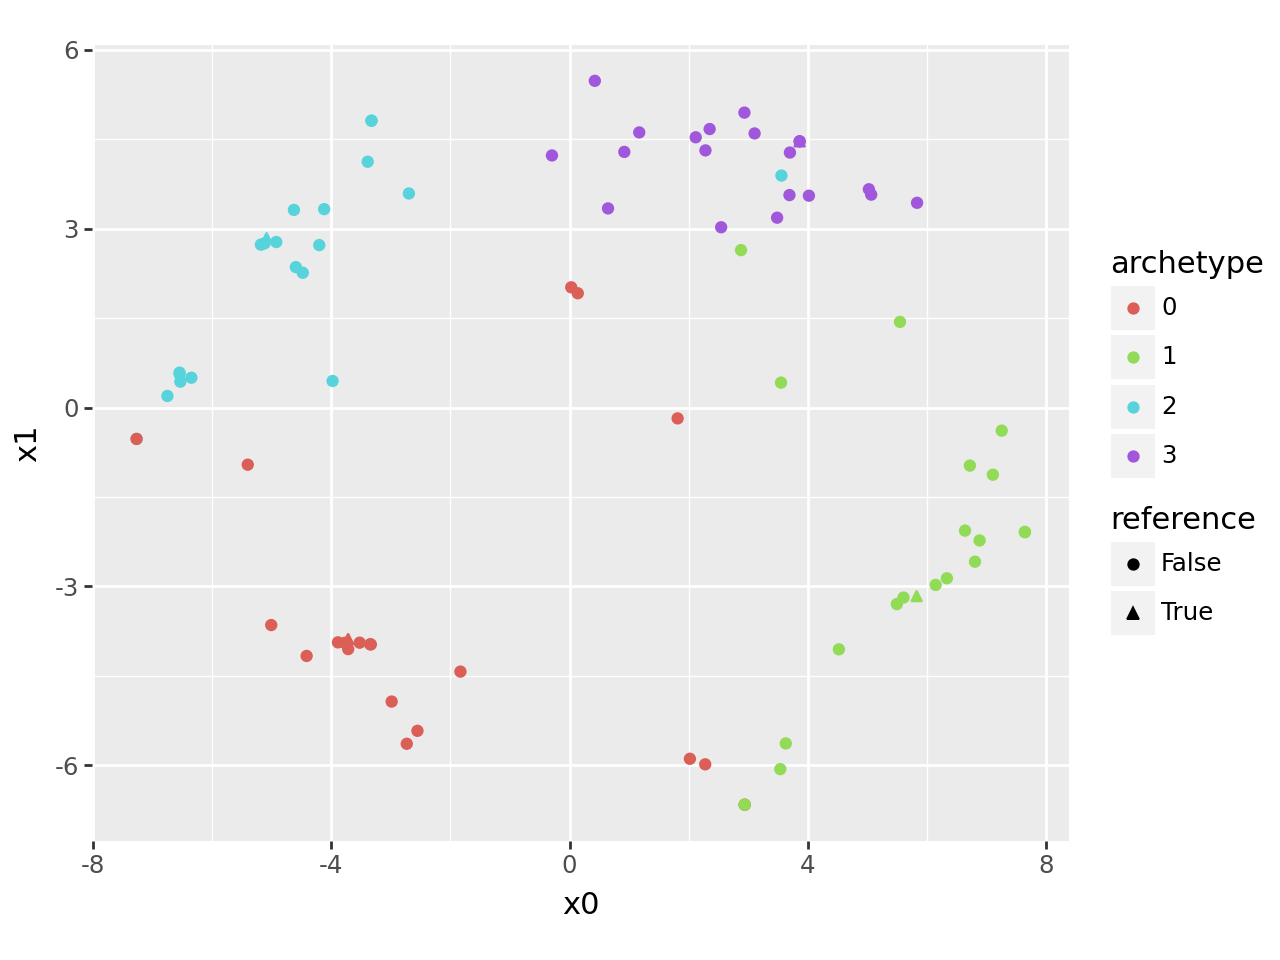

In [10]:
pt.plot_bootstrap_2D(adata, n_archetypes=4)

In [11]:
pt.compute_archetype_weights(adata=adata, mode="automatic")
archetype_expression = pt.compute_archetype_expression(adata=adata, layer="z_scaled")

Applied length scale is 3.44.


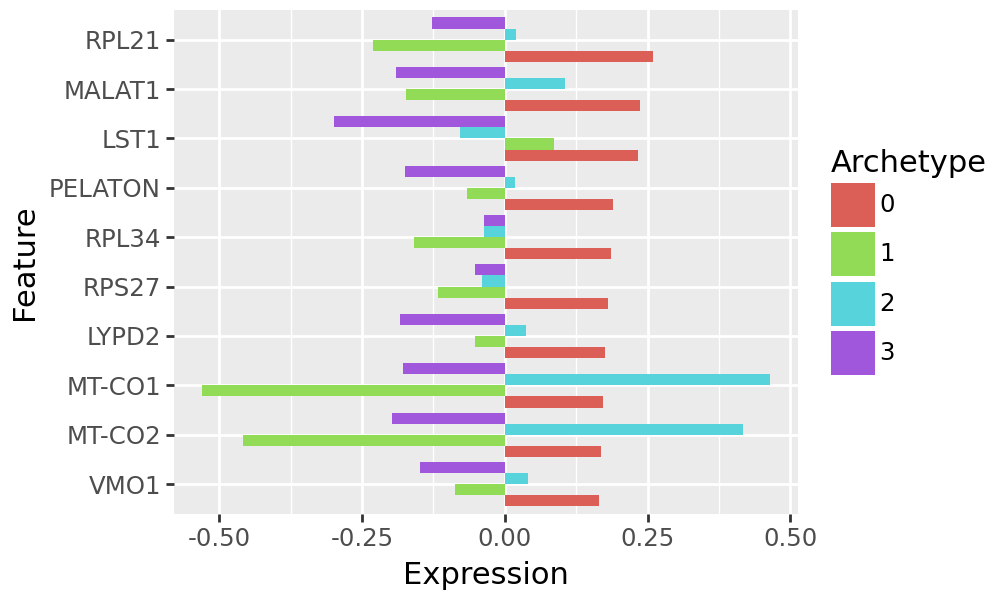

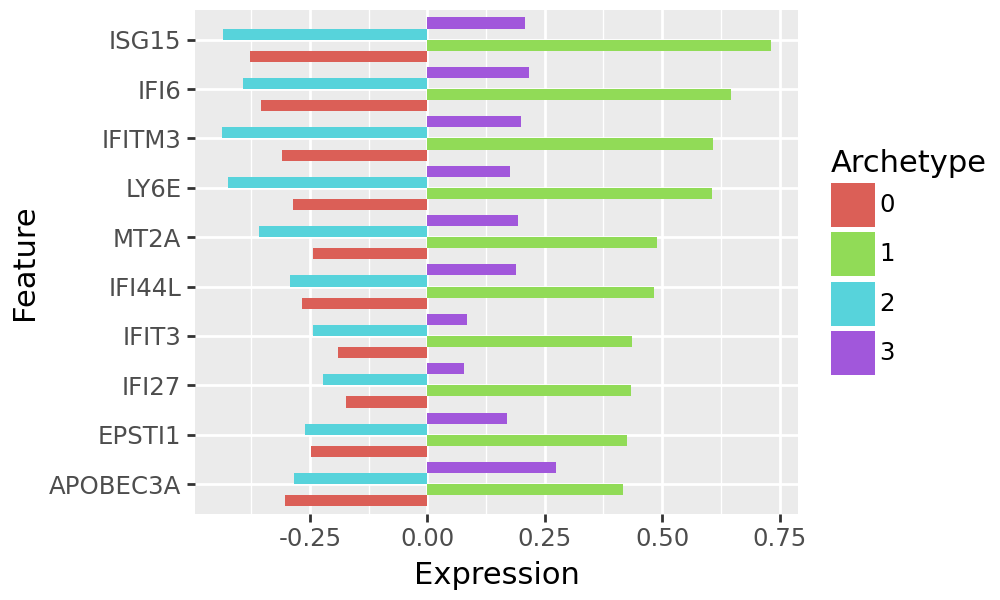

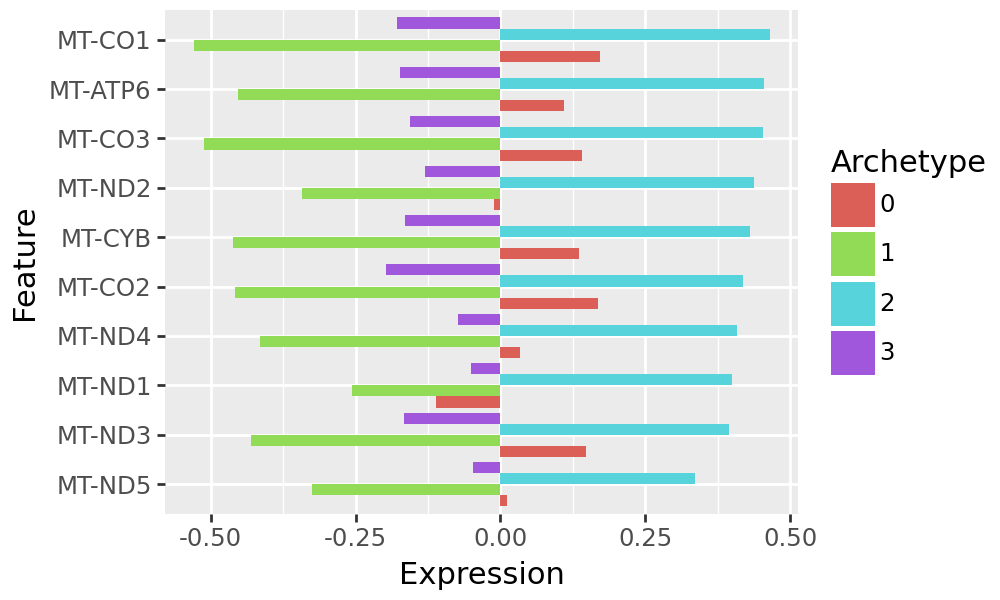

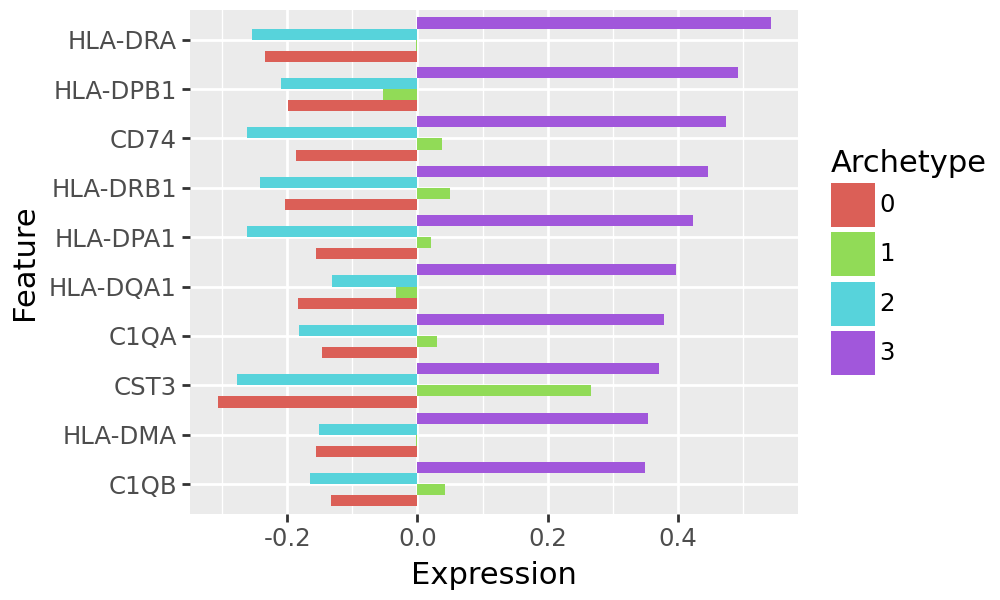

In [12]:
for arch_idx in range(adata.uns["AA_results"]["Z"].shape[0]):
    p = pt.plot_top_genes(archetype_expression=archetype_expression, arch_idx=arch_idx, top_n=10) + pn.theme(figure_size=(5, 3))
    p.show()